In [97]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("whitegrid")
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

dataset = pd.read_csv("titanic.csv")
dataset.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [98]:

dataset.drop(labels = ["cabin", "ticket", "boat", "body", "home.dest"], axis = 1, inplace = True)

print(pd.isnull(dataset).sum())

pclass        1
survived      1
name          1
sex           1
age         264
sibsp         1
parch         1
fare          2
embarked      3
dtype: int64


<Axes: xlabel='age', ylabel='Density'>

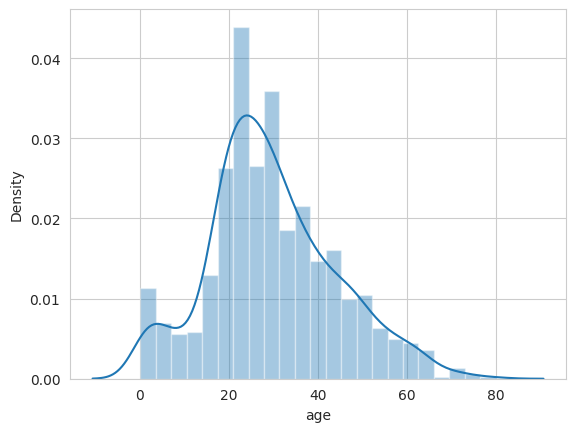

In [99]:
copy = dataset.copy()
copy.dropna(inplace = True)
sns.distplot(copy["age"])

In [100]:
dataset["age"].fillna(dataset["age"].median(), inplace = True)
dataset["embarked"].fillna("S", inplace = True)
dataset["fare"].fillna(dataset["fare"].median(), inplace = True)
dataset["pclass"].fillna(dataset["pclass"].median(), inplace = True)
dataset["survived"].fillna(dataset["survived"].median(), inplace = True)
dataset["name"].fillna("Walter", inplace = True)
dataset["sex"].fillna("female", inplace = True)
dataset["sibsp"].fillna(dataset["sibsp"].median(), inplace = True)
dataset["parch"].fillna(dataset["parch"].median(), inplace = True)
print(pd.isnull(dataset).sum())

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64


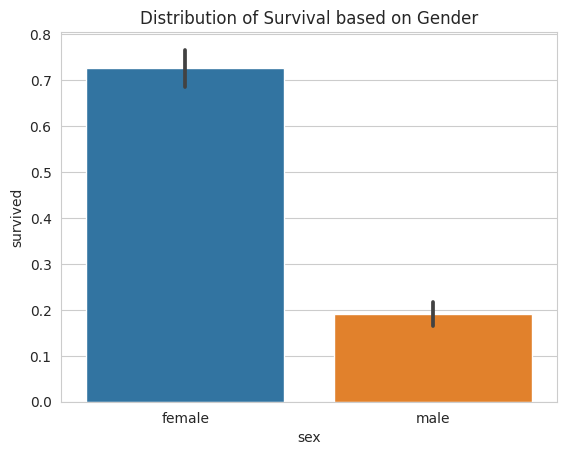

Total people survived is: 500.0
Proportion of Females who survived:
0.678
Proportion of Males who survived:
0.322


In [101]:
sns.barplot(x="sex", y="survived", data=dataset)
plt.title("Distribution of Survival based on Gender")
plt.show()

total_survived_females = dataset[dataset.sex == "female"]["survived"].sum()
total_survived_males = dataset[dataset.sex == "male"]["survived"].sum()

print("Total people survived is: " + str((total_survived_females + total_survived_males)))
print("Proportion of Females who survived:")
print(total_survived_females/(total_survived_females + total_survived_males))
print("Proportion of Males who survived:")
print(total_survived_males/(total_survived_females + total_survived_males))

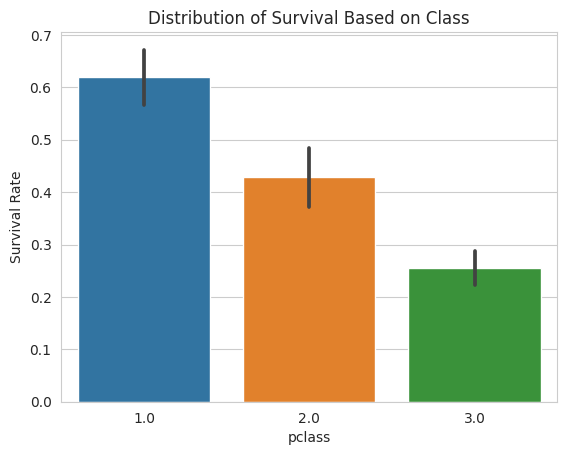

Total people survived is: 500.0
Proportion of Class 1 Passengers who survived:
0.4
Proportion of Class 2 Passengers who survived:
0.238
Proportion of Class 3 Passengers who survived:
0.362


In [102]:
sns.barplot(x="pclass", y="survived", data=dataset)
plt.ylabel("Survival Rate")
plt.title("Distribution of Survival Based on Class")
plt.show()

total_survived_one = dataset[dataset.pclass == 1]["survived"].sum()
total_survived_two = dataset[dataset.pclass == 2]["survived"].sum()
total_survived_three = dataset[dataset.pclass == 3]["survived"].sum()
total_survived_class = total_survived_one + total_survived_two + total_survived_three

print("Total people survived is: " + str(total_survived_class))
print("Proportion of Class 1 Passengers who survived:")
print(total_survived_one/total_survived_class)
print("Proportion of Class 2 Passengers who survived:")
print(total_survived_two/total_survived_class)
print("Proportion of Class 3 Passengers who survived:")
print(total_survived_three/total_survived_class)

Text(0.5, 1.0, 'Survival Rates Based on Gender and Class')

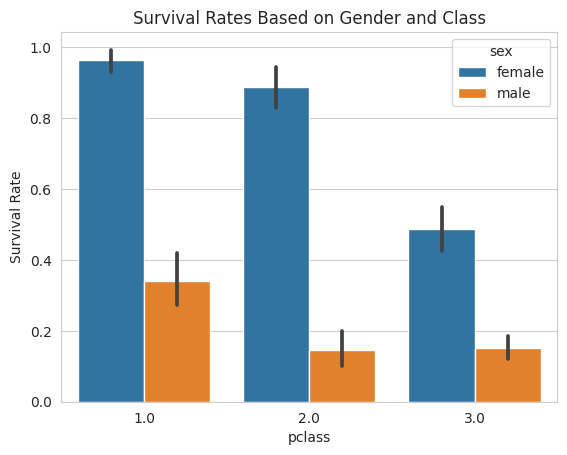

In [103]:
sns.barplot(x="pclass", y="survived", hue="sex", data=dataset)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")

Text(0.5, 1.0, 'Survival Rates Based on Gender and Class')

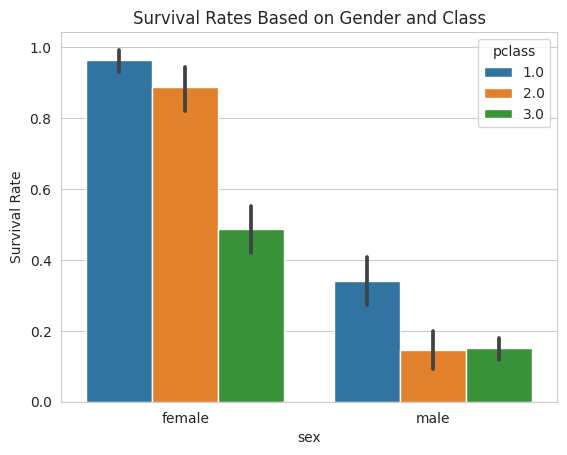

In [104]:
sns.barplot(x="sex", y="survived", hue="pclass", data=dataset)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")

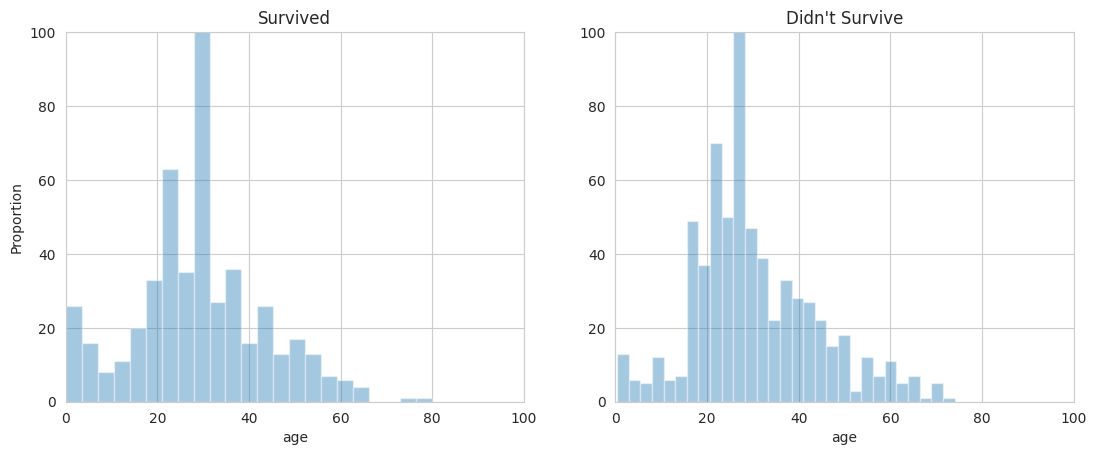

In [105]:
survived_ages = dataset[dataset.survived == 1]["age"]
not_survived_ages = dataset[dataset.survived == 0]["age"]
plt.subplot(1, 2, 1)
sns.distplot(survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Survived")
plt.ylabel("Proportion")
plt.subplot(1, 2, 2)
sns.distplot(not_survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Didn't Survive")
plt.subplots_adjust(right=1.7)
plt.show()

<Axes: xlabel='survived', ylabel='age'>

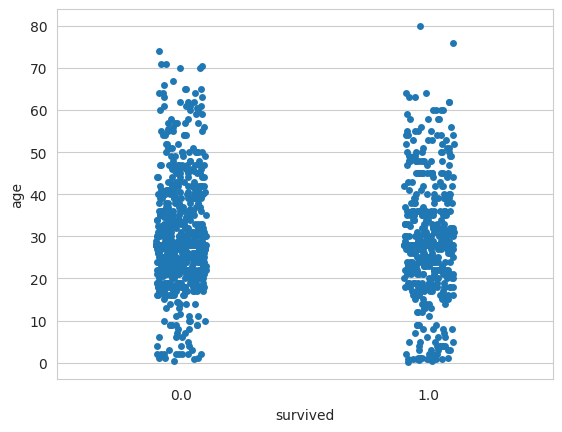

In [108]:
sns.stripplot(x="survived", y="age", data=dataset, jitter=True)

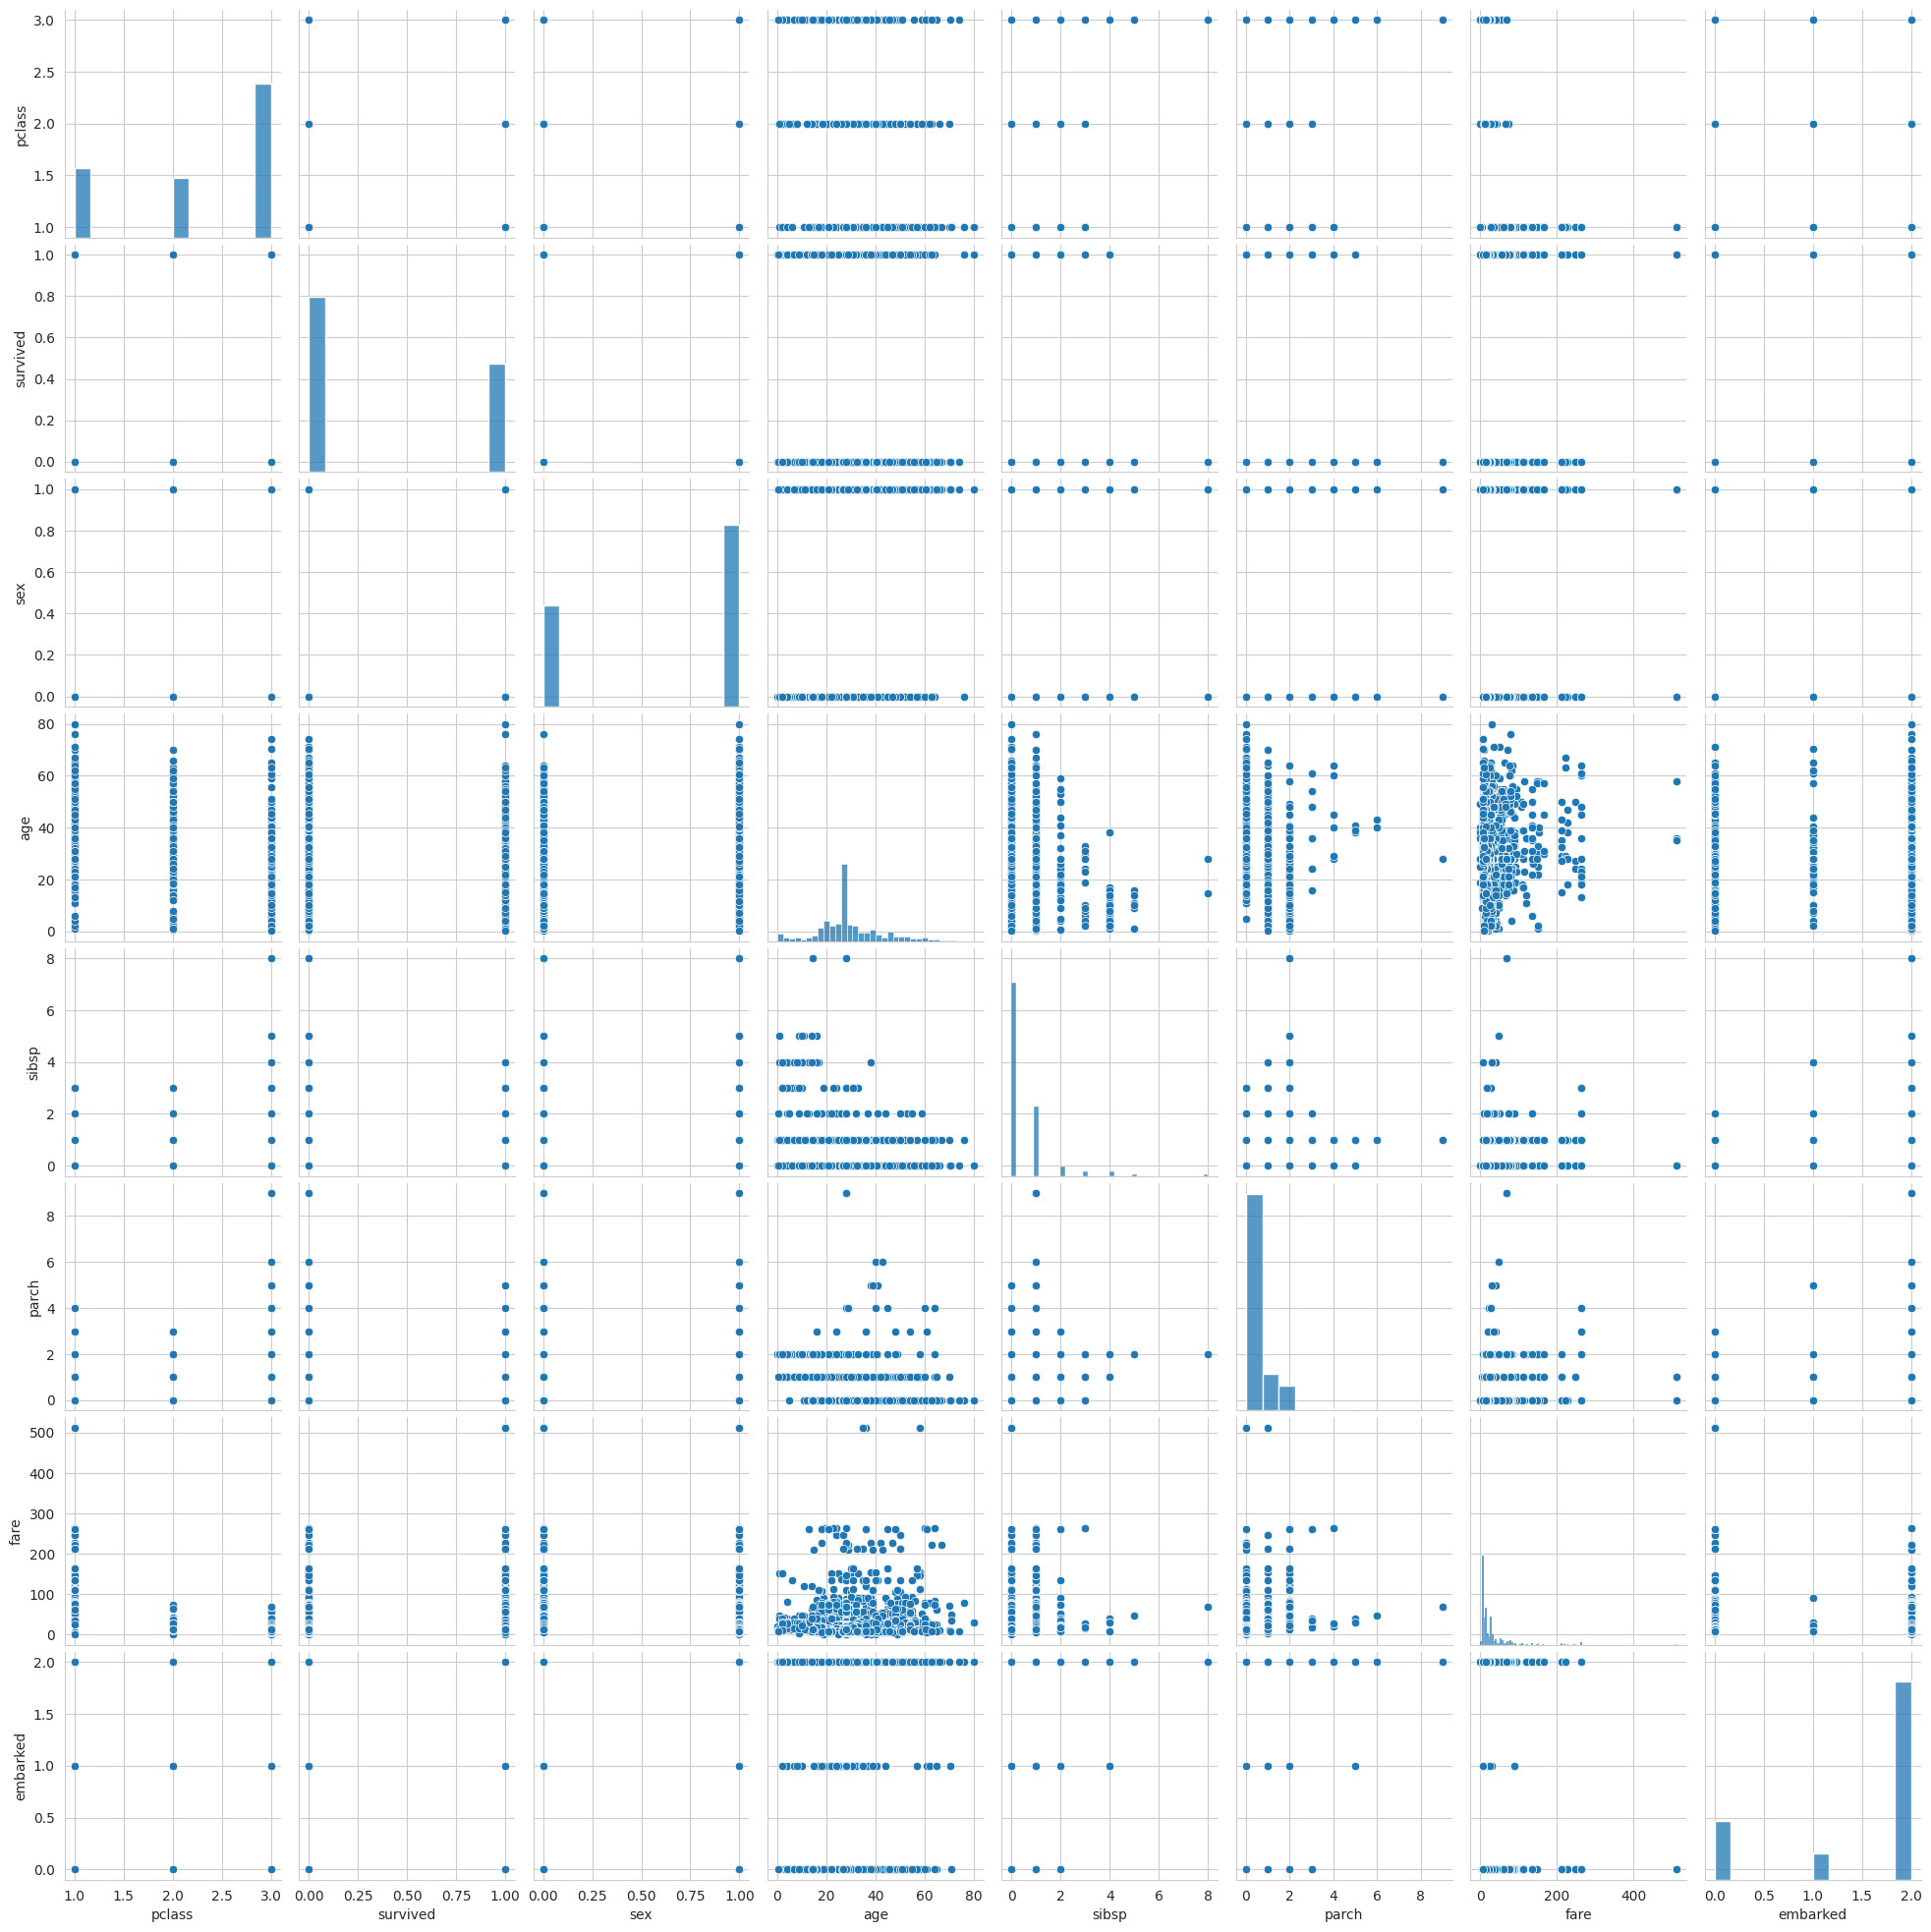

In [109]:
sns.pairplot(dataset)

In [106]:
le_sex = LabelEncoder()
le_sex.fit(dataset["sex"])

encoded_sex_dataset = le_sex.transform(dataset["sex"])
dataset["sex"] = encoded_sex_dataset

le_embarked = LabelEncoder()
le_embarked.fit(dataset["embarked"])

encoded_embarked_dataset = le_embarked.transform(dataset["embarked"])
dataset["embarked"] = encoded_embarked_dataset

dataset.sample(5)

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked
218,1.0,1.0,"Oliva y Ocana, Dona. Fermina",0,39.0,0.0,0.0,108.9000,0
460,2.0,1.0,"Jacobsohn, Mrs. Sidney Samuel (Amy Frances Chr...",0,24.0,2.0,1.0,27.0000,2
930,3.0,0.0,"Kiernan, Mr. Philip",1,28.0,1.0,0.0,7.7500,1
1134,3.0,0.0,"Pokrnic, Mr. Tome",1,24.0,0.0,0.0,8.6625,2
265,1.0,1.0,"Sloper, Mr. William Thompson",1,28.0,0.0,0.0,35.5000,2
